Data Analysis of Zomato

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Zomato data .csv")

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
df['rate'] = df['rate'].apply(handlerate)


In [5]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

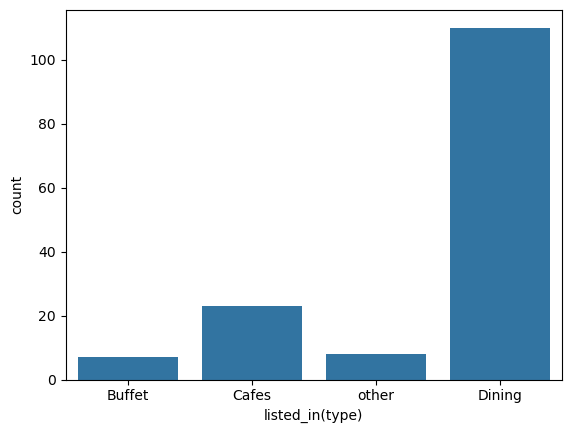

In [8]:
sns.countplot(x=df['listed_in(type)'])
plt.xlable("Type of Restuarent")

In [ ]:
# Votes received from received from customers

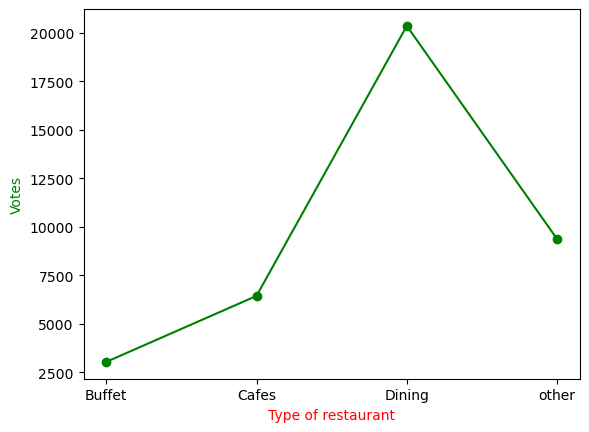

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'listed_in(type)' and sum up the 'votes'
grouped_data = df.groupby('listed_in(type)')['votes'].sum()

# Convert the grouped data to a DataFrame
result = pd.DataFrame({'votes': grouped_data})

# Plot the data
plt.plot(result.index, result['votes'], c="green", marker="o")

# Add labels to the axes
plt.xlabel("Type of restaurant", color="red", fontsize=10)
plt.ylabel("Votes", color="green", fontsize=10)

# Display the plot
plt.show()


In [10]:
# Votes received from the customers 

AttributeError: 'tuple' object has no attribute 'bins'

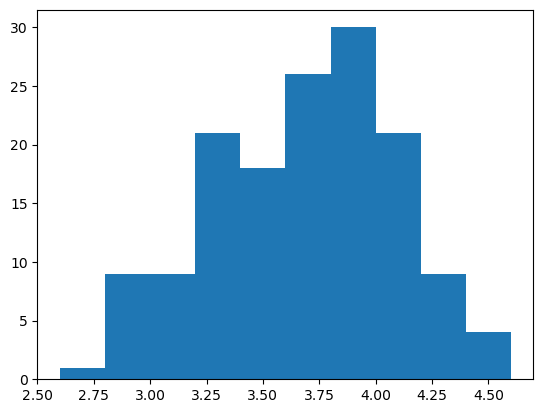

In [11]:
plt.hist(df['rate']).bins=15
plt.title("Rating Disturbition")
plt.show()

Maximum Votes received from the customers is 3.75 to 4

In [12]:
#Zomato has observed that most of the couples order their food in the online. What is their average spending on each order?

In [13]:
df.head(15)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

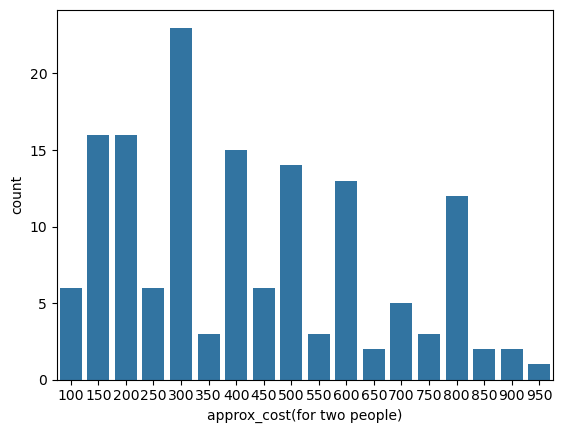

In [14]:
couple_data = df["approx_cost(for two people)"]
sns.countplot(x=couple_data)

average spending on each order is 300

In [15]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

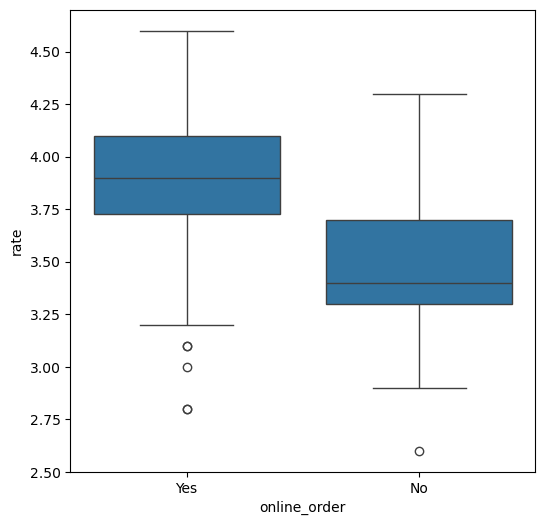

In [16]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y='rate', data=df)


online order received high rating comparing to offline order

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

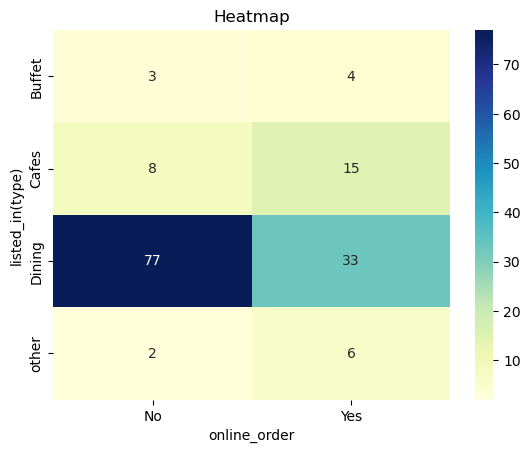

In [17]:
pivot_table=df.pivot_table(index='listed_in(type)', columns= 'online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlable("online_order")
plt.ylable("listed_in(type)")
plt.show()

#Here 'No' mean offline  'Yes' mean online order
here we can see that "77-blue" show's high offline dining and "33-sky blue" show's that few people order in online
and from 10 to 70 colour is increasing 